<a href="https://colab.research.google.com/github/carlosrabazo/deeplearning/blob/main/Ejercicio%20Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [50]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [51]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [52]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [53]:
# Creo un subconjunto de imágenes de entrenamiento que llamaré
# validation_images con las 10000 últimas imágenes del set de
# datos de entrenamiento (obviamente, lo mismo con las etiquetas
# correspondientes)
validation_images = train_images[50000:60000]
validation_labels = train_labels[50000:60000]
train_images = train_images[:50000]
train_labels = train_labels[:50000]

In [57]:
def crea_modelo(regularizador):
  modelo = models.Sequential()
  if (regularizador==0):
    modelo.add(layers.Dense(512, name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
  elif regularizador==1:
    modelo.add(layers.Dense(512,kernel_regularizer=regularizers.l1(0.001) ,
                         name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
  elif regularizador==2:
    modelo.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.001) ,
                         name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
  elif regularizador==3:
    modelo.add(layers.Dense(512,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001) ,
                         name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
  elif regularizador==4:
    modelo.add(layers.Dense(512, name='Capa_Entrada_Relu', activation='relu', input_shape=(28*28,)))
    modelo.add(layers.Dropout(0.5))
  else:
    print("Error: Código de regularizador debe estar entre 0 y 4")
    return
  modelo.add(layers.Dense(10, name='Capa_Salida_Softmax', activation='softmax'))
  modelo.summary()
  return modelo

In [58]:
def compila_modelo(modelo): 
  modelo.compile(optimizer='rmsprop', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return modelo

In [59]:
def entrena_modelo(modelo):
  historia = modelo.fit(train_images, train_labels, epochs=3, batch_size=128, 
            validation_data=(validation_images, validation_labels))
  return historia

In [60]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [61]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [24]:
network0 = crea_modelo(0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [25]:
network0 = compila_modelo(network0)

In [26]:
historia0 = entrena_modelo(network0)

Epoch 1/3
391/391 [==============================] - 5s 12ms/step - loss: 0.2766 - accuracy: 0.9200 - val_loss: 0.1378 - val_accuracy: 0.9601
Epoch 2/3
391/391 [==============================] - 6s 14ms/step - loss: 0.1133 - accuracy: 0.9668 - val_loss: 0.1069 - val_accuracy: 0.9682
Epoch 3/3
391/391 [==============================] - 5s 12ms/step - loss: 0.0743 - accuracy: 0.9772 - val_loss: 0.0793 - val_accuracy: 0.9755


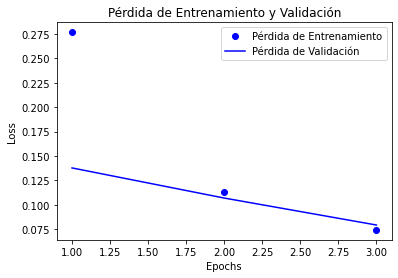

In [27]:
pinta_perdida_entrenamiento_validacion(historia0)

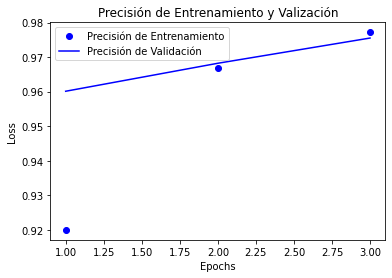

In [28]:
pinta_precision_entrenamiento_validacion(historia0)

In [29]:
network1 = crea_modelo(1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [30]:
network1 = compila_modelo(network1)

In [31]:
historia1 = entrena_modelo(network1)

Epoch 1/3
391/391 [==============================] - 6s 13ms/step - loss: 2.1599 - accuracy: 0.8405 - val_loss: 0.9763 - val_accuracy: 0.8988
Epoch 2/3
391/391 [==============================] - 5s 12ms/step - loss: 0.9722 - accuracy: 0.8767 - val_loss: 0.9031 - val_accuracy: 0.8920
Epoch 3/3
391/391 [==============================] - 5s 12ms/step - loss: 0.8427 - accuracy: 0.8994 - val_loss: 0.7607 - val_accuracy: 0.9235


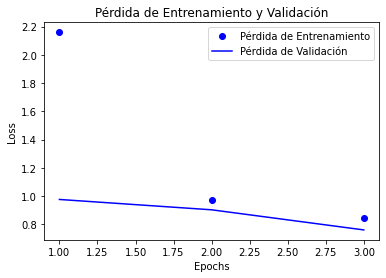

In [32]:
pinta_perdida_entrenamiento_validacion(historia1)

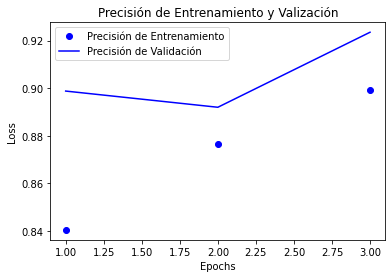

In [33]:
pinta_precision_entrenamiento_validacion(historia1)

In [37]:
network2 = crea_modelo(2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
network2 = compila_modelo(network2)

In [39]:
historia2 = entrena_modelo(network2)

Epoch 1/3
391/391 [==============================] - 6s 13ms/step - loss: 0.5229 - accuracy: 0.9130 - val_loss: 0.3151 - val_accuracy: 0.9494
Epoch 2/3
391/391 [==============================] - 5s 14ms/step - loss: 0.2651 - accuracy: 0.9542 - val_loss: 0.2275 - val_accuracy: 0.9627
Epoch 3/3
391/391 [==============================] - 7s 17ms/step - loss: 0.2114 - accuracy: 0.9629 - val_loss: 0.1893 - val_accuracy: 0.9674


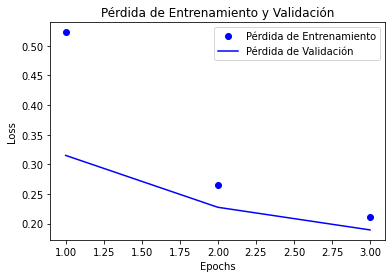

In [40]:
pinta_perdida_entrenamiento_validacion(historia2)

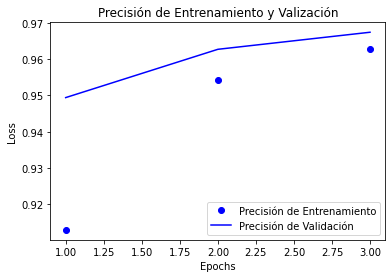

In [41]:
pinta_precision_entrenamiento_validacion(historia2)

In [44]:
network3 = crea_modelo(3)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [46]:
network3 = compila_modelo(network3)

In [47]:
historia3 = entrena_modelo(network3)

Epoch 1/3
391/391 [==============================] - 7s 17ms/step - loss: 2.1807 - accuracy: 0.8393 - val_loss: 1.0177 - val_accuracy: 0.8878
Epoch 2/3
391/391 [==============================] - 10s 25ms/step - loss: 0.9885 - accuracy: 0.8738 - val_loss: 0.9214 - val_accuracy: 0.8967
Epoch 3/3
391/391 [==============================] - 10s 26ms/step - loss: 0.8655 - accuracy: 0.8969 - val_loss: 0.7676 - val_accuracy: 0.9233


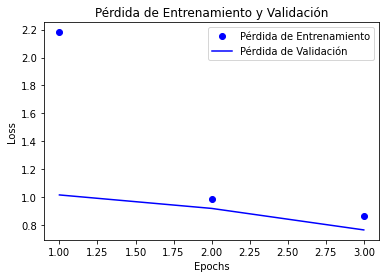

In [48]:
pinta_perdida_entrenamiento_validacion(historia3)

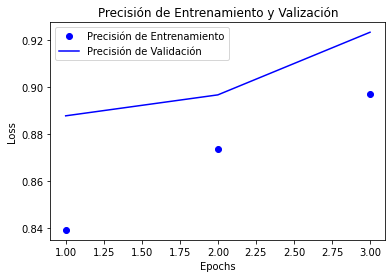

In [49]:
pinta_precision_entrenamiento_validacion(historia3)

In [62]:
network4 = crea_modelo(4)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_Entrada_Relu (Dense)   (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 Capa_Salida_Softmax (Dense)  (None, 10)               5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [63]:
network4 = compila_modelo(network4)

In [64]:
historia4 = entrena_modelo(network4)

Epoch 1/3
391/391 [==============================] - 6s 14ms/step - loss: 0.3440 - accuracy: 0.8996 - val_loss: 0.1613 - val_accuracy: 0.9563
Epoch 2/3
391/391 [==============================] - 7s 18ms/step - loss: 0.1681 - accuracy: 0.9505 - val_loss: 0.1105 - val_accuracy: 0.9684
Epoch 3/3
391/391 [==============================] - 6s 16ms/step - loss: 0.1278 - accuracy: 0.9616 - val_loss: 0.0958 - val_accuracy: 0.9730


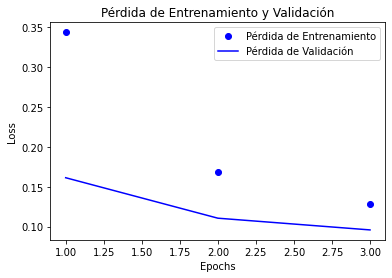

In [65]:
pinta_perdida_entrenamiento_validacion(historia4)

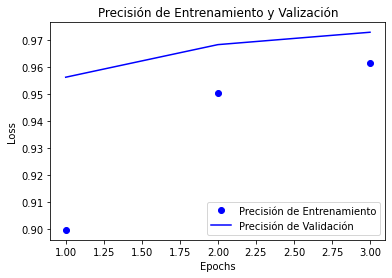

In [66]:
pinta_precision_entrenamiento_validacion(historia4)

In [67]:
network5 = crea_modelo(5)

Error: Código de regularizador debe estar entre 0 y 4
